In [1]:
from Skipass.utils.df_typing import mf_date_conv_filtered, mf_date_totime
from Skipass.station_filter.station_filter import station_filter_nivo,station_filter_synop, station_mapping 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path_to_nivo = '../raw_data/weather_nivo_data.csv'
path_to_synop = '../raw_data/weather_synop_data.csv'
year = 2018
from Skipass.utils.DataCleaner import replace_values,delete_bad_measures,select_stations
import numpy as np


In [2]:
#df_nivo = pd.read_csv(path_to_nivo)
df_synop = pd.read_csv(path_to_synop)

/home/romain/.pyenv/versions/3.8.6/envs/skipass/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
col_nivo_float = ['haut_sta','ff','t','td','n','rr24','tn12','tn24','tx12','tx24','ht_neige','ssfrai','perssfrai','phenspe1','phenspe2','t_neige','ff_alti','ht_neige_alti','neige_fraiche','m_vol_neige']

for i in col_nivo_float:
    df_nivo1[i] = df_nivo1[i].astype(float,errors='ignore')
    
col_nivo_int = ['dd','u','ww','w1','w2','nbas','hbas','cl','cm','ch','nnuage1','etat_neige','prof_sonde','nuage_val','chasse_neige','aval_descr','aval_genre','aval_depart','aval_expo','aval_risque','dd_alti','teneur_eau','grain_predom','grain_nombre','grain_diametr','homogeneite']

for j in col_nivo_int:
    df_nivo1[j] = df_nivo1[j].astype(float,errors='ignore')
;    #df_nivo1[i] = pd.to_numeric(i,errors='ignore')

NameError: name 'df_nivo1' is not defined

In [ ]:
corr = df_nivo1.corr()
plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(corr,cmap="vlag")

In [ ]:
pd.set_option('display.max_rows',61)
ratio_nivo = df_nivo1.isnull().sum()/len(df_nivo1)

# Airport weather monitoring

In [3]:
df_stations_synop = pd.read_csv('../documentation/liste_stations_rawdata_synop.txt', delimiter= ";")
station_mapping(df_stations_synop)

## cleaning main frame

In [4]:
df_synop = df_synop.replace("mq",value=np.nan)
df_synop = df_synop.replace("/",value=np.nan)

In [5]:
col_synop_float = ['ff','t','td','vv','n','tn12','tn24','tx12','tx24','tw','raf10','rafper','per','ht_neige','ssfrai','perssfrai','rr1','rr3','rr6','rr12','rr24','phenspe1','phenspe2','phenspe3','phenspe4']
col_synop_int = ['pmer','tend','cod_tend','dd','u','ww','w1','w2','nbas','hbas','cl','cm','ch','pres','niv_bar','geop','tend24','sw','etat_sol','nnuage1','nnuage2','nnuage3','nnuage4','ctype1','ctype2','ctype3','ctype4','hnuage1','hnuage2','hnuage3','hnuage4']

In [6]:
for i in col_synop_float:
    df_synop[i] = df_synop[i].astype(float,errors='ignore')

In [7]:
for i in col_synop_int:
    #df_synop[i] = df_synop[i].astype(int,errors='ignore')
    df_synop[i] = df_synop[i].astype(float,errors='ignore')
    #df_synop[i] = df_synop[i].astype(str).astype('int64',errors='ignore')
    #df_synop[i] = pd.to_numeric(df_synop[i],errors='ignore')

In [8]:
df_synop = mf_date_totime(df_synop)

## Data explorations

In [9]:
pd.set_option('display.max_rows',61)
ratio_synop = df_synop.isnull().sum()/len(df_synop)

<AxesSubplot:>

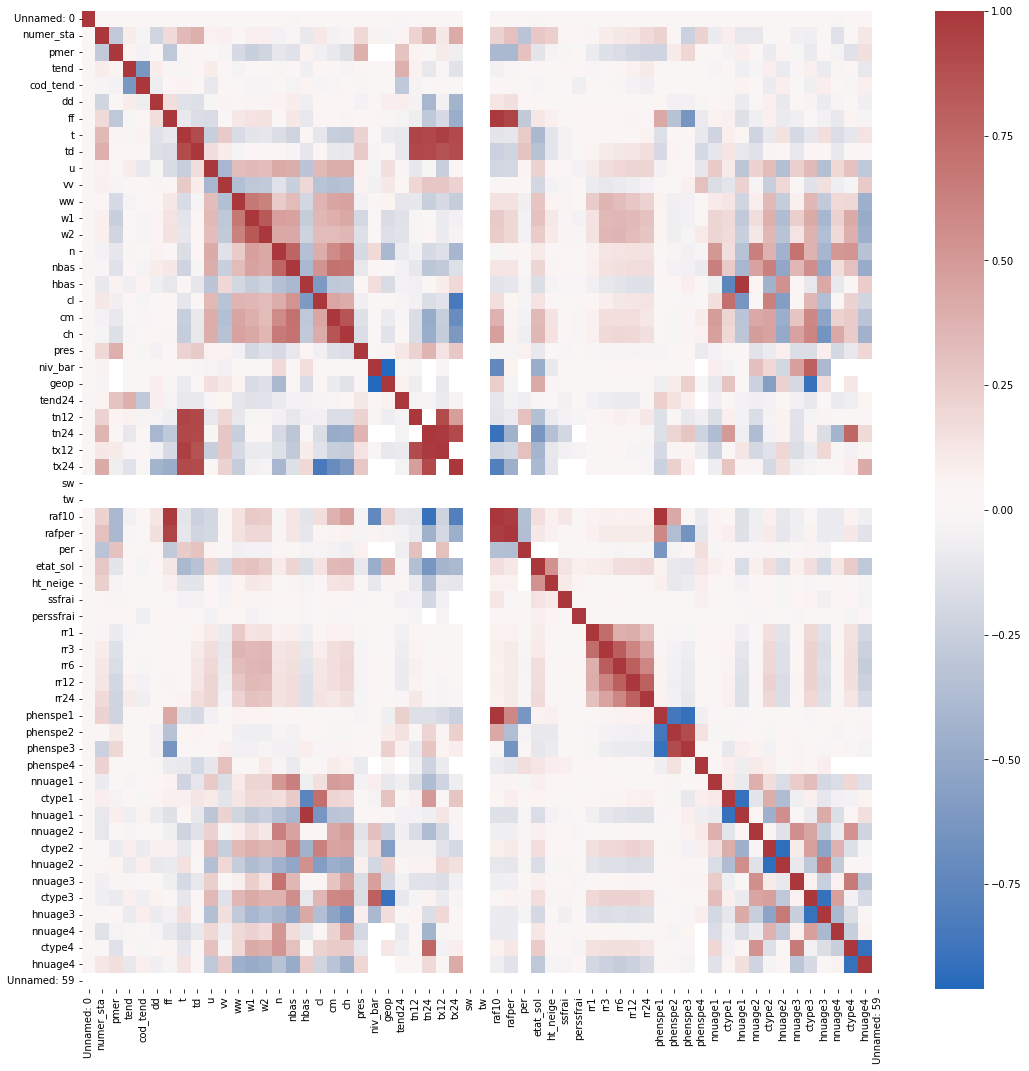

In [10]:
corr = df_synop.corr()
plt.subplots(figsize=(18,18))         # Sample figsize in inches
sns.heatmap(corr,cmap="vlag")

## Initial data selection

In [11]:
mnemo = ['date','numer_sta','pmer','dd','ff','t','u','n','rr24','ssfrai']
mnemo1 = ['date','numer_sta','dd','ff','t','u','n','rr24','ssfrai'] #manque pression niveau de la mer (pmer)

In [ ]:
ratio_nivo = pd.Series(ratio_nivo,name='nivo')
ratio_synop = pd.Series(ratio_synop,name='synop')

In [ ]:
ratio_comp = pd.concat([ratio_nivo, ratio_synop],axis=1)

In [ ]:
pd.set_option('display.max_rows',84)

In [ ]:
ratio_comp.dropna().T[mnemo1].T

In [12]:
df_synop_9 = df_synop[mnemo1]

<AxesSubplot:xlabel='date', ylabel='Count'>

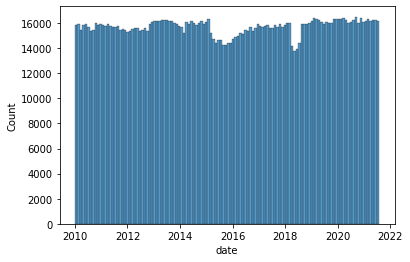

In [13]:
sns.histplot(data=df_synop_9.date)

In [14]:
line = int(np.ceil(len(df_synop_9.columns)/3))
line

3

In [15]:
df_synop_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1948926 entries, 0 to 1948925
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   date       datetime64[ns]
 1   numer_sta  int64         
 2   dd         float64       
 3   ff         float64       
 4   t          float64       
 5   u          float64       
 6   n          float64       
 7   rr24       float64       
 8   ssfrai     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 133.8 MB


In [16]:
col_array = df_synop_9.columns.to_list()
largeur = 24
hauteur = line * 5

In [18]:
df_synop_9[['date']]

,date
0,2018-07-01 00:00:00
1,2018-07-01 00:00:00
2,2018-07-01 00:00:00
3,2018-07-01 00:00:00
4,2018-07-01 00:00:00
...,...
1948921,2021-07-31 21:00:00
1948922,2021-07-31 21:00:00
1948923,2021-07-31 21:00:00
1948924,2021-07-31 21:00:00


In [27]:
x = df_synop_9[['dd']].isna()
X = df_synop_9[['date']].merge(x[x['dd'] == True], how='left', left_index=True, right_index=True)
X = X.dropna()
X = X['date']
X




42        2018-07-01 00:00:00
96        2018-07-01 03:00:00
150       2018-07-01 06:00:00
204       2018-07-01 09:00:00
258       2018-07-01 12:00:00
                  ...        
1948030   2021-07-30 00:00:00
1948091   2021-07-30 03:00:00
1948211   2021-07-30 09:00:00
1948270   2021-07-30 12:00:00
1948792   2021-07-31 15:00:00
Name: date, Length: 22155, dtype: datetime64[ns]

In [28]:
plt.hist(X.dropna()[['date']],bins=60);

KeyError: "None of [Index(['date'], dtype='object')] are in the [index]"

In [35]:
del col_array[0]

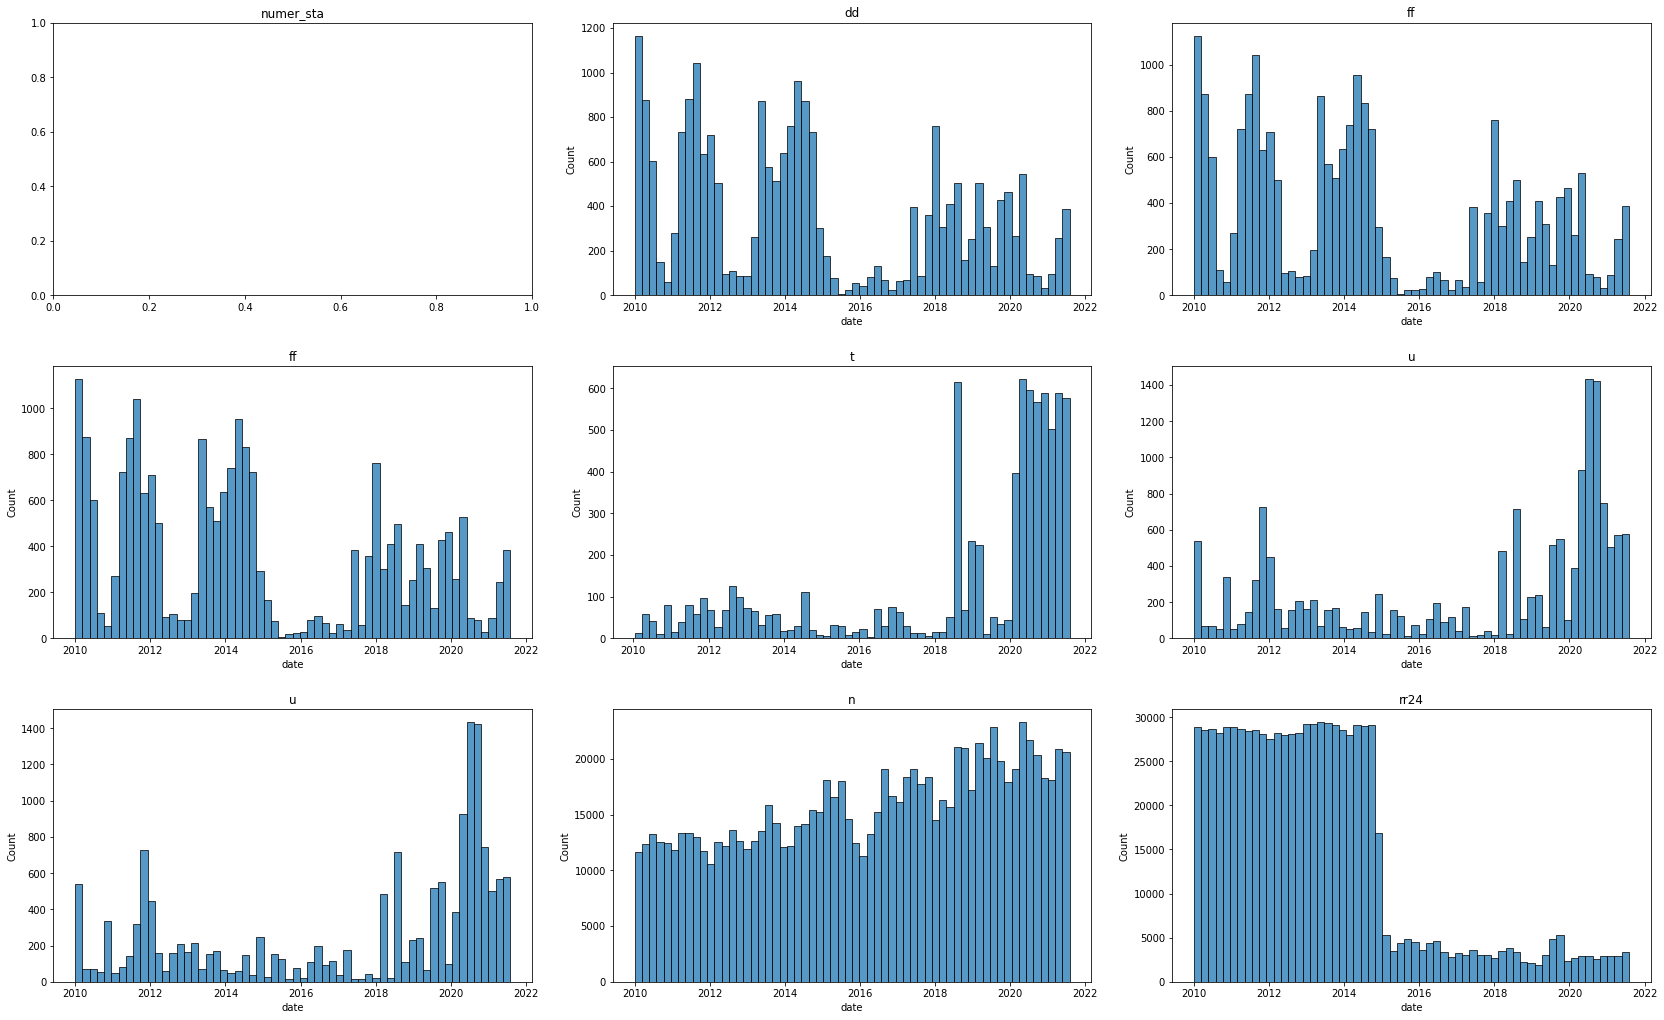

In [36]:
fig, ax1 = plt.subplots(line,3, figsize=(largeur,hauteur))
fig.tight_layout(pad=5.0)
for i in range(line):
    for j in range(3):
        ax1[i,j].set_title(col_array[i*2+j])
        x = df_synop_9[[col_array[i*2+j]]].isna()
        X = df_synop_9[['date']].merge(x[x[col_array[i*2+j]] == True], how='left', left_index=True, right_index=True)
        X = X.dropna()     
        sns.histplot(x=X['date'],bins=60, ax=ax1[i,j],)

In [43]:
df_synop_9.groupby('numer_sta').count().describe()

,date,dd,ff,t,u,n,rr24,ssfrai
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31434.290323,31076.951613,31087.322581,31311.596774,31181.983871,16052.387097,17749.612903,5144.516129
std,5102.695689,5548.185872,5540.056000,5144.281668,5206.362033,9790.065132,5037.611486,7173.479590
min,10509.000000,9600.000000,9693.000000,9926.000000,9960.000000,0.000000,0.000000,0.000000
25%,32049.250000,32000.000000,32007.000000,30919.000000,30773.500000,11189.750000,17109.750000,0.000000
50%,33537.500000,33474.500000,33474.500000,33523.500000,33495.000000,18768.500000,20154.000000,1429.500000
75%,33767.250000,33722.750000,33722.750000,33740.500000,33726.250000,21950.250000,20840.250000,8764.000000
max,33816.000000,33815.000000,33815.000000,33807.000000,33801.000000,32384.000000,23236.000000,29846.000000


In [51]:
df_synop_9.groupby('numer_sta').count().sort_values('date')

,date,dd,ff,t,u,n,rr24,ssfrai
numer_sta,,,,,,,,
78894,10509,10509,10509,9926,9960,0,10179,0
78890,10868,9600,9693,10868,10868,0,9387,0
61970,13188,9749,9749,13184,13159,0,1316,0
67005,23512,23472,23478,23508,23485,11954,10610,0
61968,26482,24495,24500,26463,26407,0,13623,0
...,...,...,...,...,...,...,...,...
7481,33795,33791,33792,33781,33778,32384,21016,29846
7630,33798,33774,33774,33781,33781,22240,20848,10203
7222,33800,33770,33770,33794,33792,25818,20943,40
